Example
- Pulls data
- Creates graphs of VWC, PET, Precip over selected time
- Creates hist of VWC, PET, Precip
- Creates CDF of VWC and PET
- Creates PDF of VWC and PET

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import scipy.stats as stats
import seaborn as sns
import matplotlib.dates as mdates

/Users/adriennekirk/Flash Droughts/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# year 2024, lat = 42.45, lon = -76.48
# Insert year, lat and lon needed
year = 2024
lat = 42.45
lon = -76.48

url = f"https://csf-irrigation-api-worker.rcc-acis.workers.dev/vwc/?year={year}&lat={lat}&lon={lon}&token=api-4a0607-token"

req = requests.get(url)
data = req.text
# print(data)

data = json.loads(data)
df = pd.DataFrame({
    "date": data["dates"],
    "precip": data["precip"],
    "pet": data["pet"],
    "vwc": data["vwc"]
})
# print(df)

dates = df["date"]
precip = df["precip"]
pet = df["pet"]
vwc = df["vwc"]

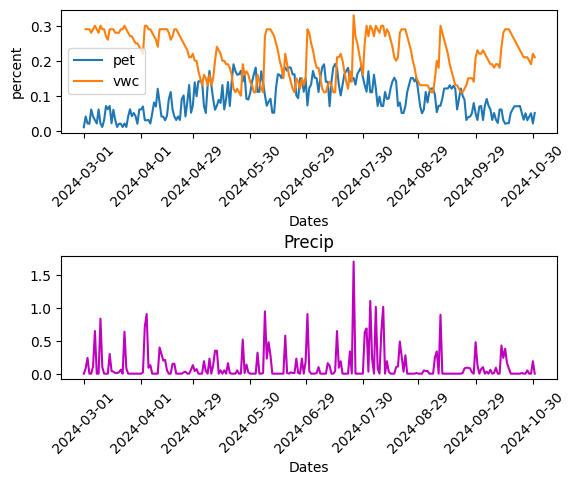

In [3]:
# Produces graph of PET,VWC,Precip over selected time

dates = df["date"]
precip = df["precip"]
pet = df["pet"]
vwc = df["vwc"]
fig, axs = plt.subplots(2,1)
axs[0].set_xlabel("Dates")
axs[0].set_ylabel("percent")
# axs[0].plot(dates,pet,label = "pet")
# axs[0].plot(dates,vwc,label = "vwc")
axs[0].xaxis.set_major_locator(mdates.MonthLocator())
# axs[1].plot(dates,precip, label = "precip", color = 'm')
axs[1].set_xlabel("Dates")
axs[1].xaxis.set_major_locator(mdates.MonthLocator())
axs[1].tick_params(axis='x', labelrotation=45)
axs[0].tick_params(axis='x', labelrotation=45)
plt.subplots_adjust(hspace=1)
axs[0].plot(dates,pet,label = "pet")
axs[0].plot(dates,vwc,label = "vwc")
axs[1].plot(dates,precip, label = "precip", color = 'm')
axs[1].set_title('Precip')
axs[0].legend()
        

Text(0.5, 1.0, 'Precip')

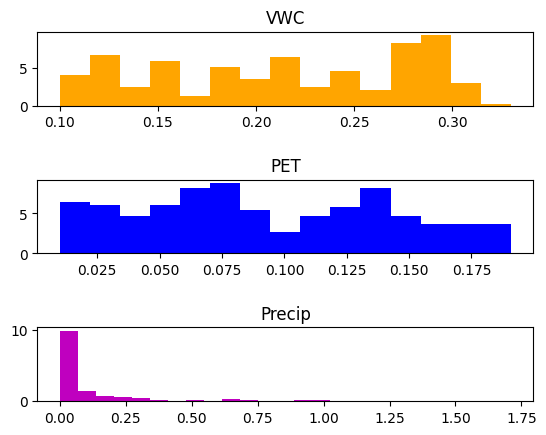

In [4]:
# Produces hist of VWC, PET, Precip
# Choose bin size
bin = 15
fig, axs = plt.subplots(3,1)
plt.subplots_adjust(hspace=1)
axs[0].hist(vwc, bins = bin, density =True , color = 'orange')
axs[0].set_title('VWC')
axs[1].hist(pet, bins = bin, density =True, color = 'b')
axs[1].set_title('PET')
axs[2].hist(precip, bins = 25, density =True, color = 'm')
axs[2].set_title('Precip')

In [5]:
# Produces CDF of VWC and PET
# Shows both sns.ecdf and plt.plot 
# below has sns.ecdf plotted together
# VWC
vwc_arr = vwc.to_numpy()
# cut out first value of nan
vwc_arr = vwc_arr[1:]
vwc_list = vwc_arr.tolist()
# print(vwc_list)
sorted_vwc = np.sort(vwc_list)
vwc_len = len(vwc_list)
# cdf_vwc = []
# for i in range(vwc_len):
#     cdf = np.sum(sorted_vwc <= sorted_vwc[i])/vwc_len
#     cdf_vwc.append(cdf)
# fig, axs = plt.subplots(2,1)
# sns.ecdfplot(vwc_list, ax = axs[0], label = 'sns', color = 'b')
# axs[0].plot(sorted_vwc,cdf_vwc, label = 'plt.plot', color = 'orange')

# PET
pet_arr = pet.to_numpy()
pet_list = pet_arr.tolist()
sorted_pet = np.sort(pet_list)
pet_len = len(pet_list)
# cdf_pet = []
# for i in range(pet_len):
#     cdf = np.sum(sorted_pet <= sorted_pet[i])/pet_len
#     cdf_pet.append(cdf)
# sns.ecdfplot(pet_list, ax = axs[1], label = 'sns', color = 'b')
# axs[1].plot(sorted_pet,cdf_pet, label = 'plt.plot', color = 'orange')
# # Graph
# axs[0].set_title('VWC')
# axs[0].set_xlabel('Percentages')
# axs[0].set_ylabel('Cumulative Probability')
# axs[0].legend()
# axs[0].grid(True)
# axs[1].set_title('PET')
# axs[1].set_xlabel('Percentages')
# axs[1].set_ylabel('Cumulative Probability')
# axs[1].legend()
# axs[1].grid(True)
# plt.subplots_adjust(hspace=1)

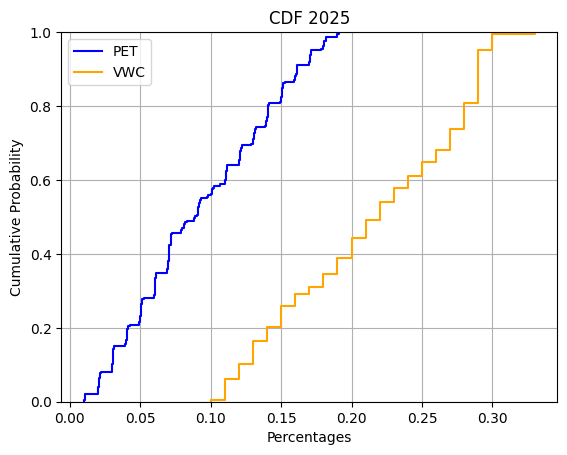

In [6]:
sns.ecdfplot(pet_list, label = 'PET', color = 'b')
sns.ecdfplot(vwc_list, label = 'VWC', color = 'orange')
plt.title('CDF 2025')
plt.xlabel('Percentages')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)

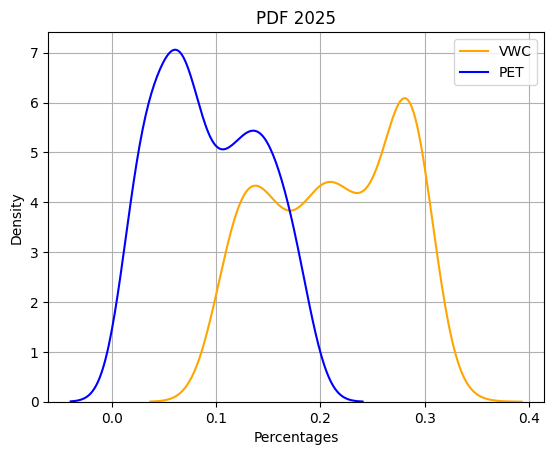

In [7]:
# Creates PDF of VWC and PET

vwc_pdf = sns.kdeplot(vwc_list, label = 'VWC', color = 'orange')
pet_pdf = sns.kdeplot(pet_list, label = 'PET', color = 'b')
plt.title('PDF 2025')
plt.xlabel('Percentages')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

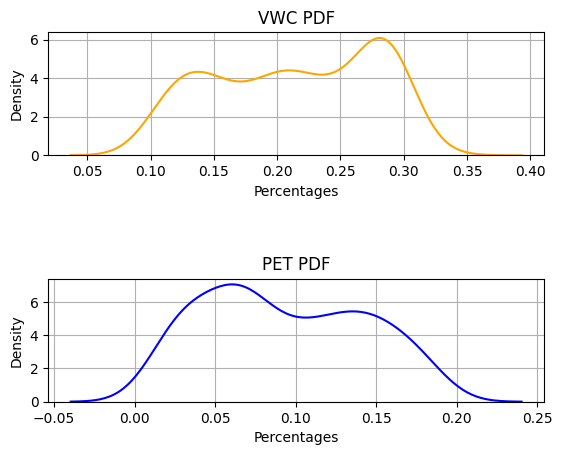

In [8]:
# Graphed seperately
fig, axs = plt.subplots(2,1)
vwc_pdf = sns.kdeplot(vwc_list, ax = axs[0], label = 'VWC', color = 'orange')
pet_pdf = sns.kdeplot(pet_list, ax = axs[1], label = 'PET', color = 'b')
axs[0].set_title('VWC PDF')
axs[0].set_xlabel('Percentages')
axs[0].set_ylabel('Density')
axs[0].grid(True)
axs[1].set_title('PET PDF')
axs[1].set_xlabel('Percentages')
axs[1].set_ylabel('Density')
axs[1].grid(True)
plt.subplots_adjust(hspace = 1)

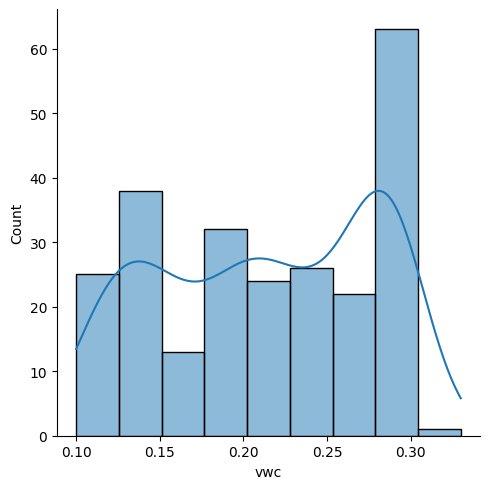

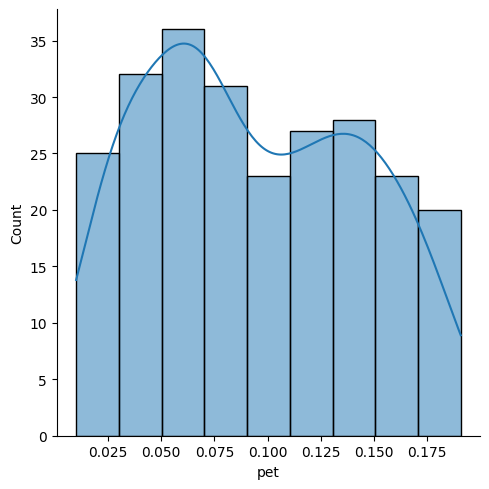

In [9]:
sns.displot(df, x="vwc", kde=True)
sns.displot(df, x="pet", kde=True)